In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
# yes, you can read dataframes from URLs!
# from google.colab import files
# uploaded = files.upload()
# colab에서 실행 할 때 가능..

Saving sbux.csv to sbux.csv


In [0]:
# !ls

sample_data  sbux.csv


In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples')
df = pd.read_csv('sbux.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [3]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [4]:
# Start by doing the WRONG thing - trying to predict the price itself
series = df['close'].values.reshape(-1, 1)
# 과거 데이터 가지고 과거 데이터 예측...당연히 맞을 수 밖에

In [5]:
series

array([[28.185],
       [28.07 ],
       [28.13 ],
       ...,
       [54.69 ],
       [55.61 ],
       [54.46 ]])

In [6]:
# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
# scaler을 활용하지 않으면 숫자 연산 크기가 커져서 가능한 줄이기 위해 사용하는 것
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [8]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T): # 시퀀스가 이동하다보면 마지막에 이동할 수가 없어서 빼주는 것
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape) # 인덱스1258에서 10개를 뺀 개수가 1249개

X.shape (1249, 10, 1) Y.shape (1249,)


In [9]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)  # classification이 아니라서 acc는 의미가 없다..

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 624 samples, validate on 625 samples
Epoch 1/80
624/624 [==============================] - 1s 840us/sample - loss: 0.3206 - acc: 0.0000e+00 - val_loss: 0.5021 - val_acc: 0.0000e+00
Epoch 2/80
624/624 [==============================] - 0s 268us/sample - loss: 0.0201 - acc: 0.0000e+00 - val_loss: 0.2387 - val_acc: 0.0000e+00
Epoch 3/80
624/624 [==============================] - 0s 266us/sample - loss: 0.0107 - acc: 0.0000e+00 - val_loss: 0.0329 - val_acc: 0.0000e+00
Epoch 4/80
624/624 [==============================] - 0s 263us/sample - loss: 0.0067 - acc: 0.0000e+00 - val_loss: 0.0331 - val_acc: 0.0000e+00
Epoch 5/80
624/624 [==============================] - 0s 264us/sample - loss: 0.0078 - acc: 0.0000e+00 - val_loss: 0.0247 - val_acc: 0.0000e+00
Epoch 6/80
624/624 [==============================] - 0s 26

624/624 [==============================] - 0s 285us/sample - loss: 0.0061 - acc: 0.0000e+00 - val_loss: 0.0396 - val_acc: 0.0000e+00
Epoch 53/80
624/624 [==============================] - 0s 288us/sample - loss: 0.0066 - acc: 0.0000e+00 - val_loss: 0.0226 - val_acc: 0.0000e+00
Epoch 54/80
624/624 [==============================] - 0s 280us/sample - loss: 0.0082 - acc: 0.0000e+00 - val_loss: 0.0373 - val_acc: 0.0000e+00
Epoch 55/80
624/624 [==============================] - 0s 279us/sample - loss: 0.0060 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 56/80
624/624 [==============================] - 0s 271us/sample - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0215 - val_acc: 0.0000e+00
Epoch 57/80
624/624 [==============================] - 0s 269us/sample - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0609 - val_acc: 0.0000e+00
Epoch 58/80
624/624 [==============================] - 0s 266us/sample - loss: 0.0062 - acc: 0.0000e+00 - val_loss: 0.0205 - val_acc: 0.0000e+

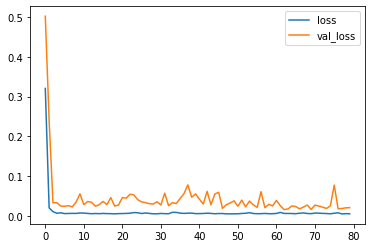

In [10]:
# plot accuracy per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1249, 1)


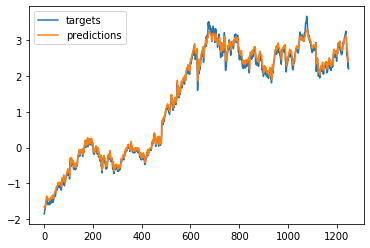

In [11]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

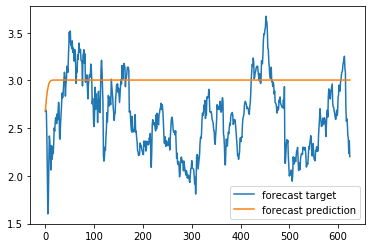

In [12]:
# Multi-step forecast # 바른 방법
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar

    # update the predictions list
    validation_predictions.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [13]:
# calculate returns by first shifting the data
df['PrevClose'] = df['close'].shift(1)  # move everything up 1

# so now it's like
# close / prev close
# x[2] x[1]
# x[3] x[2]
# x[4] x[3]
# ...
# x[t] x[t-1]

In [14]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [15]:
# then the return is
# (x[t] - x[t-1]) / x[t-1]
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose'] 
#변동폭... 마이너스면 종가대비 하락이고 반대는 상승이란 의미

In [16]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


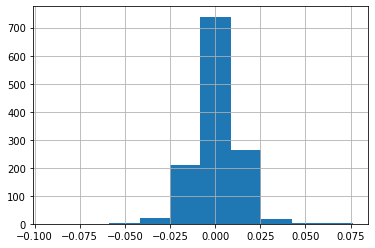

In [17]:
# Now let's try an LSTM to predict returns
df['Return'].hist()

In [18]:
series = df['Return'].values[1:].reshape(-1, 1)

# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [19]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


In [20]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1)
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 624 samples, validate on 624 samples
Epoch 1/80
624/624 [==============================] - 1s 1ms/sample - loss: 1.0087 - val_loss: 1.1369
Epoch 2/80
624/624 [==============================] - 0s 277us/sample - loss: 0.9897 - val_loss: 1.1665
Epoch 3/80
624/624 [==============================] - 0s 274us/sample - loss: 0.9876 - val_loss: 1.1610
Epoch 4/80
624/624 [==============================] - 0s 268us/sample - loss: 0.9758 - val_loss: 1.1762
Epoch 5/80
624/624 [==============================] - 0s 271us/sample - loss: 0.9809 - val_loss: 1.1527
Epoch 6/80
624/624 [==============================] - 0s 269us/sample - loss: 0.9734 - val_loss: 1.1745
Epoch 7/80
624/624 [==============================] - 0s 272us/sample - loss: 0.9701 - val_loss: 1.2244
Epoch 8/80
624/624 [==============================] - 0s 272us/sample - loss: 0.9650 - val_loss: 1.1896
Epoch 9/80
624/624 [==============================] - 0s 269us/sample - loss: 0.9698 - val_loss: 1.1692
Epoch 10/80
624/624 

624/624 [==============================] - 0s 266us/sample - loss: 0.9221 - val_loss: 1.2449
Epoch 79/80
624/624 [==============================] - 0s 269us/sample - loss: 0.9286 - val_loss: 1.2628
Epoch 80/80
624/624 [==============================] - 0s 269us/sample - loss: 0.9016 - val_loss: 1.2379


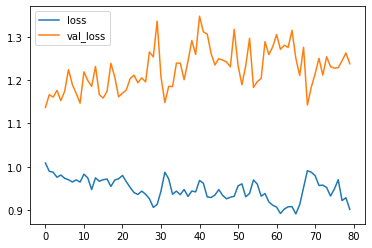

In [21]:
# plot accuracy per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
# return 값으로 한 것에 비해 loss 값의 오차가 있다

(1248, 1)


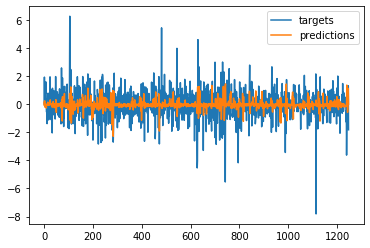

In [22]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()
# 거의 못맞추넹

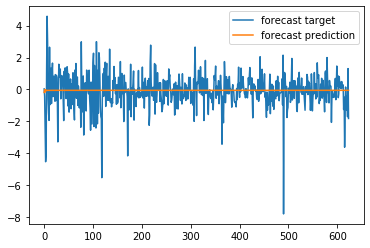

In [23]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar

    # update the predictions list
    validation_predictions.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [24]:
# Now turn the full data into numpy arrays

# Not yet in the final "X" format
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [25]:
# Now make the actual data which will go into the nerual network
T = 10 # the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T # (e.g. if T=10 and you have 11 data points then you'd only have 1 same thing)

In [26]:
# normalize the inputs
Ntrain = len(input_data) * 2// 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [27]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain) # zero를 채우고 하는게 더 빨라서

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [28]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N -Ntrain)

for u in range(N - Ntrain):
  # u counts from 0...(N-Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [29]:
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)


In [30]:
# train the RNN
r = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_test, Y_test),
)

Train on 839 samples, validate on 410 samples
Epoch 1/300
839/839 [==============================] - 1s 805us/sample - loss: 0.6956 - acc: 0.4827 - val_loss: 0.6908 - val_acc: 0.5171
Epoch 2/300
839/839 [==============================] - 0s 263us/sample - loss: 0.6941 - acc: 0.5066 - val_loss: 0.6937 - val_acc: 0.4854
Epoch 3/300
839/839 [==============================] - 0s 260us/sample - loss: 0.6920 - acc: 0.5221 - val_loss: 0.6936 - val_acc: 0.4854
Epoch 4/300
839/839 [==============================] - 0s 263us/sample - loss: 0.6918 - acc: 0.5197 - val_loss: 0.6914 - val_acc: 0.5317
Epoch 5/300
839/839 [==============================] - 0s 263us/sample - loss: 0.6914 - acc: 0.5292 - val_loss: 0.6913 - val_acc: 0.5317
Epoch 6/300
839/839 [==============================] - 0s 260us/sample - loss: 0.6913 - acc: 0.5268 - val_loss: 0.6922 - val_acc: 0.4927
Epoch 7/300
839/839 [==============================] - 0s 262us/sample - loss: 0.6920 - acc: 0.5018 - val_loss: 0.6949 - val_acc: 0.

839/839 [==============================] - 0s 260us/sample - loss: 0.6669 - acc: 0.5805 - val_loss: 0.7031 - val_acc: 0.5049
Epoch 61/300
839/839 [==============================] - 0s 253us/sample - loss: 0.6626 - acc: 0.5864 - val_loss: 0.7059 - val_acc: 0.4927
Epoch 62/300
839/839 [==============================] - 0s 255us/sample - loss: 0.6637 - acc: 0.5912 - val_loss: 0.7029 - val_acc: 0.4927
Epoch 63/300
839/839 [==============================] - 0s 255us/sample - loss: 0.6626 - acc: 0.6007 - val_loss: 0.7031 - val_acc: 0.4927
Epoch 64/300
839/839 [==============================] - 0s 256us/sample - loss: 0.6605 - acc: 0.5971 - val_loss: 0.7050 - val_acc: 0.4878
Epoch 65/300
839/839 [==============================] - 0s 253us/sample - loss: 0.6595 - acc: 0.5900 - val_loss: 0.7074 - val_acc: 0.5024
Epoch 66/300
839/839 [==============================] - 0s 259us/sample - loss: 0.6577 - acc: 0.5924 - val_loss: 0.7042 - val_acc: 0.5024
Epoch 67/300
839/839 [=========================

839/839 [==============================] - 0s 255us/sample - loss: 0.5558 - acc: 0.6949 - val_loss: 0.8011 - val_acc: 0.4439
Epoch 120/300
839/839 [==============================] - 0s 261us/sample - loss: 0.5541 - acc: 0.6913 - val_loss: 0.8035 - val_acc: 0.4610
Epoch 121/300
839/839 [==============================] - 0s 259us/sample - loss: 0.5480 - acc: 0.6889 - val_loss: 0.8056 - val_acc: 0.4659
Epoch 122/300
839/839 [==============================] - 0s 254us/sample - loss: 0.5456 - acc: 0.6985 - val_loss: 0.8079 - val_acc: 0.4561
Epoch 123/300
839/839 [==============================] - 0s 257us/sample - loss: 0.5397 - acc: 0.7044 - val_loss: 0.8079 - val_acc: 0.4561
Epoch 124/300
839/839 [==============================] - 0s 253us/sample - loss: 0.5411 - acc: 0.7056 - val_loss: 0.8053 - val_acc: 0.4610
Epoch 125/300
839/839 [==============================] - 0s 253us/sample - loss: 0.5367 - acc: 0.7104 - val_loss: 0.8302 - val_acc: 0.4634
Epoch 126/300
839/839 [==================

839/839 [==============================] - 0s 257us/sample - loss: 0.4125 - acc: 0.7974 - val_loss: 1.0678 - val_acc: 0.4512
Epoch 179/300
839/839 [==============================] - 0s 255us/sample - loss: 0.4084 - acc: 0.7914 - val_loss: 1.0826 - val_acc: 0.4415
Epoch 180/300
839/839 [==============================] - 0s 255us/sample - loss: 0.4199 - acc: 0.7878 - val_loss: 1.0811 - val_acc: 0.4537
Epoch 181/300
839/839 [==============================] - 0s 256us/sample - loss: 0.4092 - acc: 0.7974 - val_loss: 1.0995 - val_acc: 0.4610
Epoch 182/300
839/839 [==============================] - 0s 255us/sample - loss: 0.4113 - acc: 0.8021 - val_loss: 1.0855 - val_acc: 0.4390
Epoch 183/300
839/839 [==============================] - 0s 265us/sample - loss: 0.4215 - acc: 0.7843 - val_loss: 1.0930 - val_acc: 0.4707
Epoch 184/300
839/839 [==============================] - 0s 256us/sample - loss: 0.4090 - acc: 0.8093 - val_loss: 1.1056 - val_acc: 0.4439
Epoch 185/300
839/839 [==================

839/839 [==============================] - 0s 265us/sample - loss: 0.2919 - acc: 0.8713 - val_loss: 1.4699 - val_acc: 0.4610
Epoch 238/300
839/839 [==============================] - 0s 260us/sample - loss: 0.2812 - acc: 0.8749 - val_loss: 1.4140 - val_acc: 0.4732
Epoch 239/300
839/839 [==============================] - 0s 254us/sample - loss: 0.2724 - acc: 0.8868 - val_loss: 1.4201 - val_acc: 0.4634
Epoch 240/300
839/839 [==============================] - 0s 249us/sample - loss: 0.2780 - acc: 0.8832 - val_loss: 1.4364 - val_acc: 0.4585
Epoch 241/300
839/839 [==============================] - 0s 251us/sample - loss: 0.2675 - acc: 0.8856 - val_loss: 1.4264 - val_acc: 0.4780
Epoch 242/300
839/839 [==============================] - 0s 248us/sample - loss: 0.2735 - acc: 0.8808 - val_loss: 1.4688 - val_acc: 0.4756
Epoch 243/300
839/839 [==============================] - 0s 251us/sample - loss: 0.2665 - acc: 0.8856 - val_loss: 1.4639 - val_acc: 0.4537
Epoch 244/300
839/839 [==================

839/839 [==============================] - 0s 259us/sample - loss: 0.1784 - acc: 0.9344 - val_loss: 1.6987 - val_acc: 0.4707
Epoch 297/300
839/839 [==============================] - 0s 249us/sample - loss: 0.1813 - acc: 0.9237 - val_loss: 1.7040 - val_acc: 0.4756
Epoch 298/300
839/839 [==============================] - 0s 256us/sample - loss: 0.1727 - acc: 0.9344 - val_loss: 1.6901 - val_acc: 0.4976
Epoch 299/300
839/839 [==============================] - 0s 254us/sample - loss: 0.1710 - acc: 0.9285 - val_loss: 1.7298 - val_acc: 0.4951
Epoch 300/300
839/839 [==============================] - 0s 250us/sample - loss: 0.1907 - acc: 0.9166 - val_loss: 1.7171 - val_acc: 0.4976


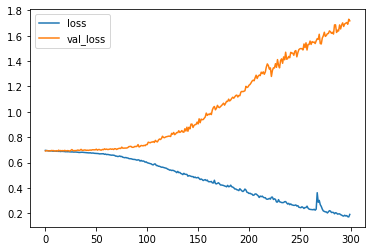

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

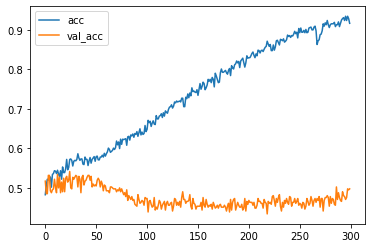

In [33]:
# plot the loss
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()